# hflights data analysis using dfply

In [ ]:
# select() picks variables based on their names.
# filter_by() picks cases based on their values.
# mutate() adds new variables that are functions of existing variables
# arrange() changes the ordering of the rows.
# summarise() reduces multiple values down to a single summary.

In [2]:
import pandas as pd
from dfply import*

## Load dataset

In [4]:
hflights = pd.read_csv("hflights_cleaned.csv", index_col=0)
hflights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,40.0,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,45.0,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,48.0,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,39.0,3.0,3.0,IAH,DFW,224,9.0,22.0,0,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,44.0,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,0


### descriptive stats

In [5]:
hflights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'Diverted'],
      dtype='object')

### Checking if NA values are there

In [5]:
hflights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
ArrTime              0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
dtype: int64

## Head and tail view

In [67]:
## 1. (a) head view

hflights >> head(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,40.0,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,45.0,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,0


In [68]:
## 1. (a) tail view

hflights >> tail(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
223872,2011,12,6,2,656.0,812.0,WN,621,N727SW,76.0,64.0,-13.0,-4.0,HOU,TUL,453,3.0,9.0,0,0
223873,2011,12,6,2,1600.0,1713.0,WN,1597,N745SW,73.0,59.0,-12.0,0.0,HOU,TUL,453,3.0,11.0,0,0


In [69]:
hflights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'Diverted'],
      dtype='object')

# Selecting columns

In [92]:
(hflights >>
 select(X.Year, X.Origin, X.Dest) >>
 head(2))

,Year,Origin,Dest
0,2011,IAH,DFW
1,2011,IAH,DFW


In [93]:
(hflights >>
 select(0, ['Origin', 'Dest']) >>
 head(2))

,Year,Origin,Dest
0,2011,IAH,DFW
1,2011,IAH,DFW


In [91]:
(hflights >>
 select(starts_with("Arr")) >>
 head(2))

,ArrTime,ArrDelay
0,1500.0,-10.0
1,1501.0,-9.0


## Columns start with 'Arr' not in dataframe

In [18]:
Arr_not_in_data = hflights >> select(~starts_with("Arr"))
Arr_not_in_data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'TailNum', 'ActualElapsedTime', 'AirTime', 'DepDelay',
       'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled',
       'Diverted'],
      dtype='object')

## Dropping column UniqueCarrier onwards

In [90]:
(hflights >>
drop(columns_from(X.UniqueCarrier)) >>
head(2))

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime
0,2011,1,1,6,1400.0,1500.0
1,2011,1,2,7,1401.0,1501.0


## Column_to() and column_from() togather

In [6]:
(hflights >> 
select(columns_to(1, inclusive=True),
       'DayOfWeek',
       columns_from(-3)) >>
head(2))

,Year,Month,DayOfWeek,TaxiOut,Cancelled,Diverted
0,2011,1,6,13.0,0,0
1,2011,1,7,9.0,0,0


# Subsetting and filtering

## row slicing

In [76]:
hflights >> row_slice([2,5])

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,48.0,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,0
5,2011,1,6,4,1359.0,1503.0,AA,428,N262AA,64.0,45.0,-7.0,-1.0,IAH,DFW,224,6.0,13.0,0,0


## Taking sample

In [77]:
hflights >> sample(frac=0.00002, replace=False)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
1390,2011,1,26,3,1302.0,1644.0,CO,534,N76254,162.0,137.0,1.0,2.0,IAH,PIT,1117,5.0,20.0,0,0
55872,2011,4,22,5,746.0,1041.0,CO,1746,N57855,175.0,143.0,38.0,21.0,IAH,ORD,925,8.0,24.0,0,0
111437,2011,7,28,4,945.0,1147.0,CO,1631,N13716,182.0,165.0,-9.0,0.0,IAH,SLC,1195,2.0,15.0,0,0
188876,2011,11,23,3,1008.0,1314.0,CO,1617,N16632,126.0,99.0,-7.0,-3.0,IAH,ATL,689,14.0,13.0,0,0


In [78]:
hflights >> sample(n=4, replace=True)

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
150611,2011,9,12,1,1540.0,1648.0,AA,458,N4XCAA,68.0,42.0,-17.0,-10.0,IAH,DFW,224,6.0,20.0,0,0
34308,2011,2,12,6,1839.0,2124.0,FL,296,N996AT,105.0,91.0,-11.0,-9.0,HOU,ATL,696,7.0,7.0,0,0
208072,2011,12,17,6,2108.0,2301.0,CO,1533,N37427,173.0,141.0,-6.0,3.0,IAH,PHX,1009,11.0,21.0,0,0
164642,2011,9,8,4,1327.0,1704.0,XE,4671,N16170,157.0,141.0,-13.0,-3.0,IAH,RIC,1157,6.0,10.0,0,0


## distinct()

In [7]:
hflights >> distinct(X.Origin) >> select(X.Origin)

,Origin
0,IAH
300,HOU


# filter_by()

In [86]:
(hflights >>
 filter_by(X.ArrDelay >= 500) >>
 select(contains("Arr")) >>
 head(3))

,ArrTime,ArrDelay
2468,807.0,775.0
34338,2143.0,500.0
43424,1953.0,516.0


## pull()
pull simply retrieves a column and returns it as a pandas series, in case you only care about one particular column at the end of your pipeline.

In [85]:
(hflights >>
 filter_by(X.ArrDelay >= 500) >>
 pull('ArrTime') >>
 head(4))

D:\Software_Installation\envs\Python3_ML\lib\site-packages\dfply\subset.py:87: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return df.ix[:, column]


2468      807.0
34338    2143.0
43424    1953.0
59765    1831.0
Name: ArrTime, dtype: float64

# mutate()

In [82]:
(hflights >> 
  select(X.ArrDelay, X.DepDelay) >> 
  mutate(Total_Delay = X.ArrDelay + X.DepDelay) >> 
  head(3))

,ArrDelay,DepDelay,Total_Delay
0,-10.0,0.0,-10.0
1,-9.0,1.0,-8.0
2,-8.0,-8.0,-16.0


### Transmute

In [140]:
(hflights >> 
  select(X.ArrDelay, X.DepDelay) >> 
  transmute(Total_Delay = X.ArrDelay + X.DepDelay) >> 
  head(3))

,Total_Delay
0,-10.0
1,-8.0
2,-16.0


### mutate between

In [95]:
(hflights >> 
 select(X.ArrDelay) >> 
 mutate(arr_delay_btwn=between(X.ArrDelay, 1, 5)) >>
 head(6))

,ArrDelay,arr_delay_btwn
0,-10.0,False
1,-9.0,False
2,-8.0,False
3,3.0,True
4,-3.0,False
5,-7.0,False


## Arranging



In [84]:
(hflights >>
 arrange(X.ArrDelay, ascending=False) >>
 select(X.ArrDelay)>>
 head())

,ArrDelay
205174,978.0
150287,957.0
202367,918.0
108291,861.0
90768,822.0


## rename()
The rename() function will rename columns provided as values to what you set as the keys in the keyword arguments. You can indicate columns with symbols or with their labels.


In [86]:
hflights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'Diverted'],
      dtype='object')

In [24]:
hflights = hflights >> rename(Destination=X.Dest)
hflights >> select(X.Destination) >> head(2)

,Destination
0,DFW
1,DFW


In [25]:
hflights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Destination', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'Diverted'],
      dtype='object')

## Summarize

In [83]:
(hflights >>
 summarize(mean_arr_delay=X.ArrDelay.mean(), mean_dep_delay=X.DepDelay.std()))

,mean_arr_delay,mean_dep_delay
0,7.094334,28.741979


## Summarize each

In [82]:
(hflights >>
 summarize_each([np.mean, np.std], X.ArrDelay, X.DepDelay))

,ArrDelay_mean,ArrDelay_std,DepDelay_mean,DepDelay_std
0,7.094334,30.708448,9.414983,28.741915


## Group by

In [116]:
monthly_stats = (hflights >> 
  select(X.ArrDelay, X.DepDelay, X.Month) >> 
  group_by(X.Month) >> 
  summarise_each([np.mean, np.std], X.ArrDelay, X.DepDelay))

monthly_stats.head(4)

,Month,ArrDelay_mean,ArrDelay_std,DepDelay_mean,DepDelay_std
0,1,4.926065,24.712634,7.912189,23.108539
1,2,6.349233,29.917303,9.210078,28.164070
2,3,7.892718,30.459505,9.724659,28.545402
3,4,11.088744,31.442692,10.413008,28.939873


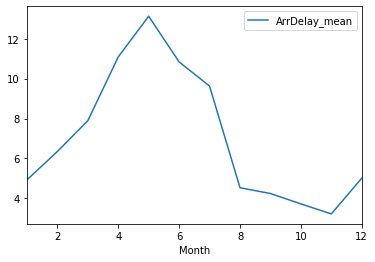

In [96]:
(hflights >> 
  select(X.ArrDelay, X.DepDelay, X.Month) >> 
  group_by(X.Month) >> 
  summarise_each([np.mean, np.std],
                 X.ArrDelay,
                 X.DepDelay)).plot(x = "Month",
                                   y = "ArrDelay_mean",
                                   kind = "line")

## Count using n()

In [81]:
(hflights >>
 group_by(X.Month) >>
 summarize(count = n(X.DayOfWeek)))

,Month,count
0,1,18665
1,2,15975
2,3,19267
3,4,18266
4,5,18830
5,6,19360
6,7,20312
7,8,19927
8,9,17914
9,10,18548


In [31]:
hflights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'AirTime',
       'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn',
       'TaxiOut', 'Cancelled', 'Diverted'],
      dtype='object')

In [103]:
(hflights >>
 filter_by(X.DepDelay <= 10) >>
 group_by(X.Month) >>
 summarize(count = n(X.FlightNum)))

,Month,count
0,1,14197
1,2,12258
2,3,14736
3,4,13763
4,5,14031
5,6,13991
6,7,14330
7,8,15878
8,9,14724
9,10,15383


### Calculating Average Speed

In [94]:
(hflights >>
 select(X.Origin, X.Distance, X.AirTime) >> 
 mutate(distance_km = X.Distance * 1.60934,
        travel_time_hr = X.AirTime/60) >>
 group_by(X.Origin) >>
 mutate(speed = X.distance_km/X.travel_time_hr) >>
 summarise(avg_speed = X.speed.mean()) >>
 arrange(X.avg_speed, ascending=False)
)

,Origin,avg_speed
0,HOU,646.179131
1,IAH,686.903034
